In [1]:
import sys, os
sys.path.append(os.path.join('..', 'scripts'))
import figure_utils as utils
import lif_utils

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.optimize

In [3]:
# See data/hubel_wiesel_1959_digitization
spike_times = [
    [],
    [0.054],
    [0.03, 0.128],
    [0.00926, 0.09088, 0.14391, 0.29092, 0.37257, 0.48277, 0.68278],
    [
        0.02081, 0.04227, 0.07145, 0.09863, 0.12738, 0.16381, 0.19339, 0.2744,
        0.39203
    ],
    [0.01234, 0.06376],
    [],
    [],
]

# Reverse the list for counter-clockwise rotation
spike_times = spike_times[0:1] + spike_times[::-1]

[-2.39957133 -0.93494213  0.17844904]


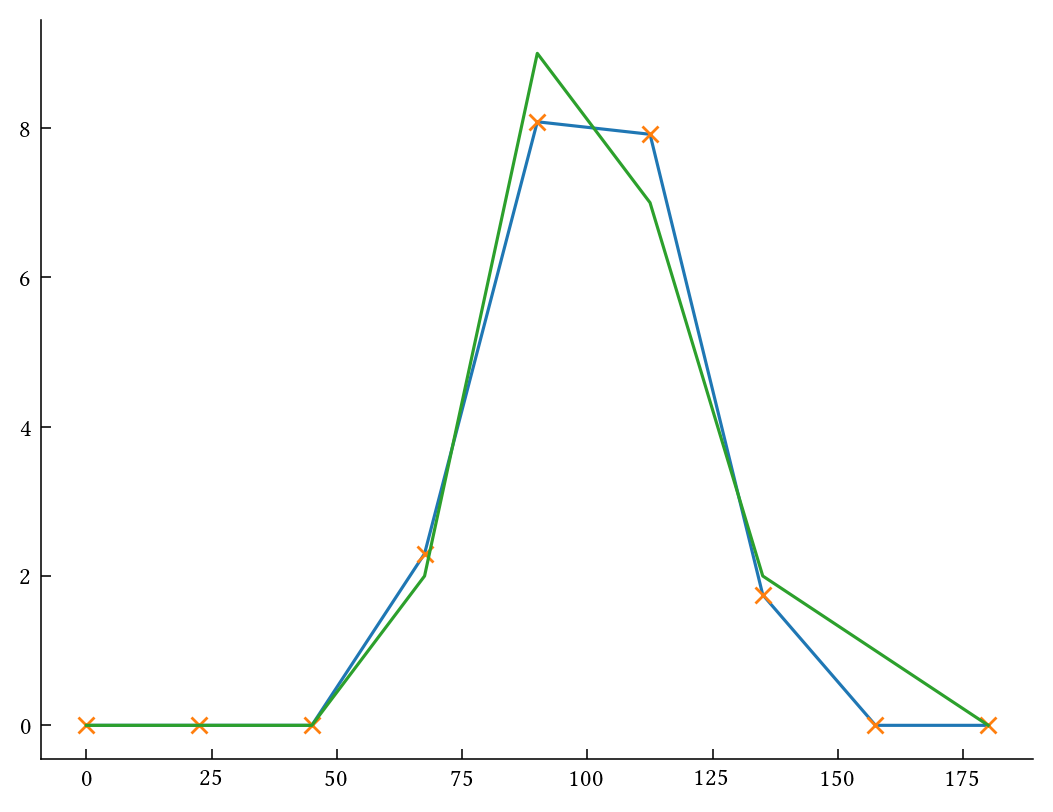

In [23]:
# Do a linear-nonlinear fit
orientations = np.arange(0, 181, 22.5)
orientations_high_res = np.arange(0, 181, 0.1)
rates = np.array([len(x) for x in spike_times])

def model(phis, ex, ey, beta):
    xs = np.cos(2.0 * phis / 180.0 * np.pi)
    ys = np.sin(2.0 * phis / 180.0 * np.pi)
    return lif_utils.lif_rate(ex * xs + ey * ys + beta, tau_ref=1e-3, tau_rc=250e-3)

def f(x):
    return np.sqrt(np.mean(np.square(model(orientations, *x) - rates)))

opt_res = scipy.optimize.minimize(f, (-1.0,  -1.0, 0.01))
print(opt_res.x)
#opt_res.x = (-1.0, -1.0, 0.1)

fig, ax = plt.subplots()

ax.plot(orientations, model(orientations, *opt_res.x))
ax.plot(orientations, model(orientations, *opt_res.x), 'x')
ax.plot(orientations, rates)

Saving to visual_cortex_tuning.large.pdf
Extracting bounding box of file visual_cortex_tuning.large.pdf
Optimising PDF and saving to visual_cortex_tuning.pdf


GPL Ghostscript 9.55.0: Can't embed the complete font LibertinusT1Math as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumTI as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumTB as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LibertinusT1Math as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LibertinusT1Math as it is too large, embedding a subset.


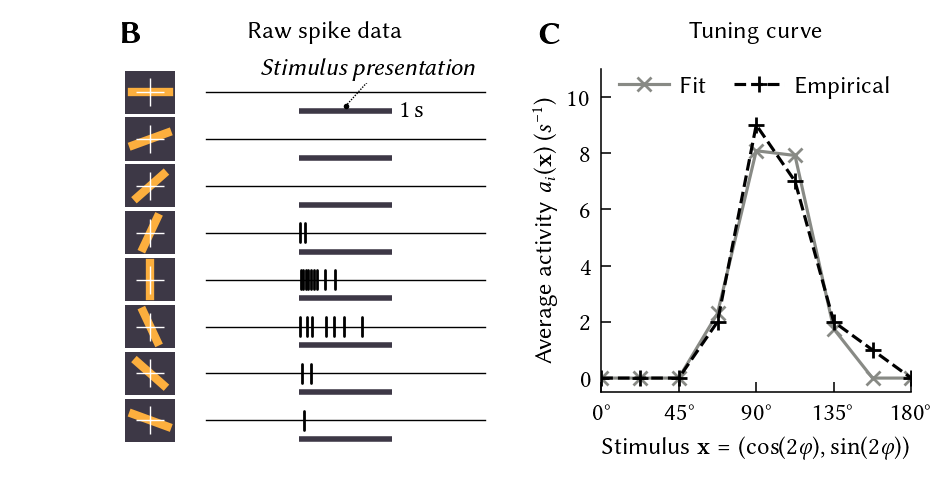

In [26]:
fig, (ax1, ax2) = plt.subplots(1,
                               2,
                               figsize=(5.75, 2.1),
                               gridspec_kw={
                                   "wspace": 0.3,
                                   "width_ratios": [4.5, 3]
                               })

for spine in ["left", "bottom"]:
    ax1.spines[spine].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_xlim(-1, 4)
ax1.set_ylim(0.6, 7.5)

for i, angle in enumerate(np.arange(0, 180, 22.5)):
    phi = np.pi * angle / 180
    x0, y0 = 0.4, 7 - i
    ax1.plot(x0,
             y0,
             '+',
             markersize=10,
             markeredgewidth=0.5,
             color='white',
             clip_on=False,
             zorder=10)

    rect = mpl.patches.Rectangle((x0 - 0.27, y0 - 0.46),
                                 0.54,
                                 0.92,
                                 edgecolor='None',
                                 facecolor='#3d3846',
                                 clip_on=False)
    ax1.add_artist(rect)

    #    ax1.plot([x0 - 0.2 * np.cos(phi), x0 + 0.2 * np.cos(phi)],
    #             [y0 + 0.35 * np.sin(phi), y0 - 0.35 * np.sin(phi)],
    #             color=utils.oranges[2],
    #             linewidth=3,
    #             clip_on=False)
    ax1.plot([x0 - 0.2 * np.cos(phi), x0 + 0.2 * np.cos(phi)],
             [y0 - 0.35 * np.sin(phi), y0 + 0.35 * np.sin(phi)],
             color=utils.oranges[2],
             linewidth=3,
             clip_on=False)

    ax1.plot([1.0, 4.0], [y0, y0], 'k-', linewidth=0.5, clip_on=False)

    for j, t in enumerate(spike_times[i]):
        x0 = 2.0
        ax1.plot([x0 + t, x0 + t], [y0 - 0.2, y0 + 0.2],
                 'k-',
                 solid_capstyle='round',
                 linewidth=1.0,
                 clip_on=False)

    ax1.plot([2.0, 3.0], [y0 - 0.4, y0 - 0.4],
             '-',
             color='#3d3846',
             solid_capstyle='butt',
             linewidth=2.0,
             clip_on=False)

    if i == 0:
        #        ax1.text(2.5,
        #                 y0 - 0.375,
        #                 '$1\\,\\mathrm{s}$',
        #                 va="bottom",
        #                 ha="center")
        ax1.text(3.1, y0 - 0.4, '$1\\,\\mathrm{s}$', va="center", ha="left")
        utils.annotate(ax1,
                       2.5,
                       y0 - 0.3,
                       2.75,
                       y0 + 0.25,
                       '\\textit{Stimulus presentation}',
                       va="bottom")

ax1.text(0.22,
         1.0555,
         '\\textbf{B}',
         fontsize=12,
         transform=ax1.transAxes,
         va="bottom")
ax1.set_title('{Raw spike data}', x=0.66, y=1.025, va="bottom")

ax2.text(-0.2,
         1.0555,
         '\\textbf{C}',
         fontsize=12,
         transform=ax2.transAxes,
         va="bottom")

#ax2.plot(np.linspace(0, np.pi, 9)[:-1], [len(x) for x in spike_times], 'k+--')
#ax2.set_xticks(np.arange(0, np.pi, np.pi / 8))
#ax2.set_xticklabels(['0', '$\\frac{\\pi}{8}$', '$\\frac{\\pi}{4}$', '$\\frac{3\\pi}{8}$', '$\\frac{\\pi}{2}$', '$\\frac{5\\pi}{8}$', '$\\frac{3\\pi}{4}$', '$\\frac{7\\pi}{8}$'])
#ax2.set_xlim(0, np.pi - np.pi / 8)

#ax2.plot(orientations_high_res, model(orientations_high_res, *opt_res.x), ':', color=utils.blues[0], linewidth=0.75)
ax2.plot(orientations, model(orientations, *opt_res.x), '-x', color=utils.grays[2], markersize=5, label="Fit")
ax2.plot(orientations, rates, 'k+--', label="Empirical")
ax2.set_xticks(np.arange(0, 181, 45))
ax2.set_xticklabels(
    ['{:0.0f}\\textdegree{{}}'.format(x) for x in np.arange(0, 181, 45)])
ax2.set_xlim(0, 180)
ax2.set_ylim(-0.5, 11)
ax2.set_title('{Tuning curve}', y=1.025, va="bottom")

ax2.set_ylabel('Average activity $a_i(\\vec{x})$ ($s^{-1}$)')
ax2.set_xlabel('Stimulus $\\vec x = (\\cos(2\\varphi), \\sin(2\\varphi))$')

ax2.legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.05), columnspacing=1.0, handlelength=2, handletextpad=0.5)

utils.save(fig, "visual_cortex_tuning.pdf")